In [1]:
import os

train_dir='C:/Users/ahmet/Desktop/CNN Projects/Chest X-Ray Images (Pneumonia)/test'
test_dir='C:/Users/ahmet/Desktop/CNN Projects/Chest X-Ray Images (Pneumonia)/train'

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2,
                             rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')
                           
                          
                            
                             
                                                    
train_gen = datagen.flow_from_directory(train_dir,
                                        target_size=(150, 150),
                                        batch_size=16,
                                        class_mode='categorical',
                                        color_mode='grayscale',
                                        shuffle=True,
                                        subset="training"
                                        )


valid_gen = datagen.flow_from_directory(train_dir,
                                        target_size=(150, 150),
                                        batch_size=16,
                                        class_mode='categorical',
                                        color_mode='grayscale',
                                        shuffle=True,
                                        subset="validation"
                                        )


test_gen = datagen.flow_from_directory(test_dir,
                                       target_size=(150, 150),
                                       batch_size=16,
                                       class_mode='categorical',
                                       color_mode='grayscale'
                                       )

Found 500 images belonging to 2 classes.
Found 124 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy

In [4]:
cnn = Sequential()

cnn.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(150,150, 1)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(tf.keras.layers.Dropout(0.2))

cnn.add(Conv2D(filters=16, kernel_size=(3,3),padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(tf.keras.layers.Dropout(0.2))

cnn.add(Conv2D(filters=64, kernel_size=(3,3),padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(tf.keras.layers.Dropout(0.2))

cnn.add(Conv2D(filters=64, kernel_size=(3,3),padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(tf.keras.layers.Dropout(0.2))

cnn.add(Flatten())

cnn.add(tf.keras.layers.Dropout(0.5))

cnn.add(Dense(512, activation='relu'))

cnn.add(tf.keras.layers.Dropout(0.2))

cnn.add(Dense(128, activation='relu'))

cnn.add(Dense(128, activation='relu'))

cnn.add(Dense(128, activation='relu'))

cnn.add(Dense(2, activation='softmax'))

In [5]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        9

In [6]:
cnn.compile(loss=categorical_crossentropy,
                    optimizer=Adam(lr=0.001),
                    metrics=['accuracy'])

In [7]:
history = cnn.fit(train_gen,
                          batch_size=16,
                          epochs=501,
                          verbose=1,
                          validation_data=valid_gen
                          )

Epoch 1/501
32/32 [==============================] - 8s 253ms/step - loss: 0.6873 - accuracy: 0.6240 - val_loss: 0.6712 - val_accuracy: 0.6290
Epoch 2/501
32/32 [==============================] - 8s 245ms/step - loss: 0.6652 - accuracy: 0.6240 - val_loss: 0.6741 - val_accuracy: 0.6290
Epoch 3/501
32/32 [==============================] - 8s 249ms/step - loss: 0.6683 - accuracy: 0.6240 - val_loss: 0.6696 - val_accuracy: 0.6290
Epoch 4/501
32/32 [==============================] - 8s 259ms/step - loss: 0.6678 - accuracy: 0.6240 - val_loss: 0.6632 - val_accuracy: 0.6290
Epoch 5/501
32/32 [==============================] - 8s 252ms/step - loss: 0.6656 - accuracy: 0.6240 - val_loss: 0.6617 - val_accuracy: 0.6290
Epoch 6/501
32/32 [==============================] - 8s 251ms/step - loss: 0.6638 - accuracy: 0.6240 - val_loss: 0.6630 - val_accuracy: 0.6290
Epoch 7/501
32/32 [==============================] - 8s 251ms/step - loss: 0.6649 - accuracy: 0.6240 - val_loss: 0.6610 - val_accuracy: 0.6290

Epoch 58/501
32/32 [==============================] - 11s 339ms/step - loss: 0.4409 - accuracy: 0.7660 - val_loss: 0.4244 - val_accuracy: 0.7258
Epoch 59/501
32/32 [==============================] - 9s 293ms/step - loss: 0.4820 - accuracy: 0.7400 - val_loss: 1.0252 - val_accuracy: 0.6452
Epoch 60/501
32/32 [==============================] - 9s 280ms/step - loss: 0.4852 - accuracy: 0.7440 - val_loss: 0.7072 - val_accuracy: 0.6855
Epoch 61/501
32/32 [==============================] - 10s 305ms/step - loss: 0.4511 - accuracy: 0.7700 - val_loss: 0.9822 - val_accuracy: 0.6694
Epoch 62/501
32/32 [==============================] - 8s 263ms/step - loss: 0.4755 - accuracy: 0.7660 - val_loss: 0.4449 - val_accuracy: 0.7742
Epoch 63/501
32/32 [==============================] - 9s 288ms/step - loss: 0.4990 - accuracy: 0.7440 - val_loss: 0.4571 - val_accuracy: 0.7500
Epoch 64/501
32/32 [==============================] - 11s 331ms/step - loss: 0.4579 - accuracy: 0.7820 - val_loss: 0.4711 - val_accura

Epoch 115/501
32/32 [==============================] - 8s 262ms/step - loss: 0.3421 - accuracy: 0.8460 - val_loss: 0.1991 - val_accuracy: 0.9597
Epoch 116/501
32/32 [==============================] - 8s 263ms/step - loss: 0.3435 - accuracy: 0.8560 - val_loss: 0.1922 - val_accuracy: 0.9435
Epoch 117/501
32/32 [==============================] - 8s 259ms/step - loss: 0.3407 - accuracy: 0.8460 - val_loss: 0.1940 - val_accuracy: 0.9677
Epoch 118/501
32/32 [==============================] - 8s 254ms/step - loss: 0.3366 - accuracy: 0.8400 - val_loss: 0.1871 - val_accuracy: 0.9274
Epoch 119/501
32/32 [==============================] - 8s 261ms/step - loss: 0.3546 - accuracy: 0.8240 - val_loss: 0.2307 - val_accuracy: 0.9274
Epoch 120/501
32/32 [==============================] - 8s 256ms/step - loss: 0.3470 - accuracy: 0.8600 - val_loss: 0.2542 - val_accuracy: 0.9032
Epoch 121/501
32/32 [==============================] - 8s 254ms/step - loss: 0.3691 - accuracy: 0.8340 - val_loss: 0.2332 - val_ac

32/32 [==============================] - 8s 255ms/step - loss: 0.3116 - accuracy: 0.8780 - val_loss: 0.1909 - val_accuracy: 0.9516
Epoch 172/501
32/32 [==============================] - 8s 252ms/step - loss: 0.3301 - accuracy: 0.8620 - val_loss: 0.2645 - val_accuracy: 0.8790
Epoch 173/501
32/32 [==============================] - 8s 255ms/step - loss: 0.3165 - accuracy: 0.8540 - val_loss: 0.2442 - val_accuracy: 0.8952
Epoch 174/501
32/32 [==============================] - 8s 254ms/step - loss: 0.3179 - accuracy: 0.8640 - val_loss: 0.1887 - val_accuracy: 0.9194
Epoch 175/501
32/32 [==============================] - 8s 253ms/step - loss: 0.3374 - accuracy: 0.8640 - val_loss: 0.2187 - val_accuracy: 0.9194
Epoch 176/501
32/32 [==============================] - 8s 253ms/step - loss: 0.2923 - accuracy: 0.8700 - val_loss: 0.2469 - val_accuracy: 0.8790
Epoch 177/501
32/32 [==============================] - 8s 256ms/step - loss: 0.2814 - accuracy: 0.8800 - val_loss: 0.2565 - val_accuracy: 0.8710

32/32 [==============================] - 8s 255ms/step - loss: 0.2800 - accuracy: 0.8760 - val_loss: 0.1792 - val_accuracy: 0.9435
Epoch 228/501
32/32 [==============================] - 8s 254ms/step - loss: 0.2876 - accuracy: 0.8900 - val_loss: 0.3006 - val_accuracy: 0.8790
Epoch 229/501
32/32 [==============================] - 8s 254ms/step - loss: 0.3015 - accuracy: 0.8740 - val_loss: 0.2254 - val_accuracy: 0.9032
Epoch 230/501
32/32 [==============================] - 8s 254ms/step - loss: 0.2690 - accuracy: 0.8880 - val_loss: 0.2390 - val_accuracy: 0.9194
Epoch 231/501
32/32 [==============================] - 8s 254ms/step - loss: 0.2809 - accuracy: 0.8900 - val_loss: 0.1646 - val_accuracy: 0.9516
Epoch 232/501
32/32 [==============================] - 8s 262ms/step - loss: 0.3102 - accuracy: 0.8860 - val_loss: 0.2091 - val_accuracy: 0.9516
Epoch 233/501
32/32 [==============================] - 8s 252ms/step - loss: 0.3134 - accuracy: 0.8860 - val_loss: 0.2336 - val_accuracy: 0.9032

32/32 [==============================] - 8s 255ms/step - loss: 0.2607 - accuracy: 0.9100 - val_loss: 0.2194 - val_accuracy: 0.9516
Epoch 284/501
32/32 [==============================] - 8s 254ms/step - loss: 0.2606 - accuracy: 0.8860 - val_loss: 0.1821 - val_accuracy: 0.9435
Epoch 285/501
32/32 [==============================] - 8s 253ms/step - loss: 0.2347 - accuracy: 0.8980 - val_loss: 0.3253 - val_accuracy: 0.9032
Epoch 286/501
32/32 [==============================] - 8s 257ms/step - loss: 0.2506 - accuracy: 0.8880 - val_loss: 0.2279 - val_accuracy: 0.9194
Epoch 287/501
32/32 [==============================] - 8s 259ms/step - loss: 0.2304 - accuracy: 0.9020 - val_loss: 0.2703 - val_accuracy: 0.9274
Epoch 288/501
32/32 [==============================] - 8s 258ms/step - loss: 0.2794 - accuracy: 0.8780 - val_loss: 0.1986 - val_accuracy: 0.9274
Epoch 289/501
32/32 [==============================] - 8s 258ms/step - loss: 0.2528 - accuracy: 0.8980 - val_loss: 0.2242 - val_accuracy: 0.9435

32/32 [==============================] - 8s 257ms/step - loss: 0.2465 - accuracy: 0.8960 - val_loss: 0.1839 - val_accuracy: 0.9274
Epoch 340/501
32/32 [==============================] - 8s 255ms/step - loss: 0.2506 - accuracy: 0.9100 - val_loss: 0.1890 - val_accuracy: 0.9435
Epoch 341/501
32/32 [==============================] - 8s 260ms/step - loss: 0.2416 - accuracy: 0.9140 - val_loss: 0.1675 - val_accuracy: 0.9435
Epoch 342/501
32/32 [==============================] - 8s 251ms/step - loss: 0.2386 - accuracy: 0.8900 - val_loss: 0.2102 - val_accuracy: 0.9194
Epoch 343/501
32/32 [==============================] - 8s 254ms/step - loss: 0.2655 - accuracy: 0.8960 - val_loss: 0.2522 - val_accuracy: 0.9194
Epoch 344/501
32/32 [==============================] - 8s 257ms/step - loss: 0.2674 - accuracy: 0.8900 - val_loss: 0.1460 - val_accuracy: 0.9839
Epoch 345/501
32/32 [==============================] - 8s 256ms/step - loss: 0.2483 - accuracy: 0.8920 - val_loss: 0.1817 - val_accuracy: 0.9274

32/32 [==============================] - 8s 263ms/step - loss: 0.2213 - accuracy: 0.9120 - val_loss: 0.2203 - val_accuracy: 0.9516
Epoch 396/501
32/32 [==============================] - 8s 258ms/step - loss: 0.2855 - accuracy: 0.8860 - val_loss: 0.1340 - val_accuracy: 0.9597
Epoch 397/501
32/32 [==============================] - 8s 258ms/step - loss: 0.2465 - accuracy: 0.9080 - val_loss: 0.1276 - val_accuracy: 0.9435
Epoch 398/501
32/32 [==============================] - 8s 262ms/step - loss: 0.2234 - accuracy: 0.9100 - val_loss: 0.2115 - val_accuracy: 0.9355
Epoch 399/501
32/32 [==============================] - 9s 267ms/step - loss: 0.2045 - accuracy: 0.9200 - val_loss: 0.2536 - val_accuracy: 0.8952
Epoch 400/501
32/32 [==============================] - 10s 318ms/step - loss: 0.2393 - accuracy: 0.9000 - val_loss: 0.3122 - val_accuracy: 0.8468
Epoch 401/501
32/32 [==============================] - 11s 354ms/step - loss: 0.2551 - accuracy: 0.9000 - val_loss: 0.2159 - val_accuracy: 0.88

32/32 [==============================] - 10s 302ms/step - loss: 0.2180 - accuracy: 0.9120 - val_loss: 0.1810 - val_accuracy: 0.9435
Epoch 452/501
32/32 [==============================] - 10s 315ms/step - loss: 0.2330 - accuracy: 0.8940 - val_loss: 0.1513 - val_accuracy: 0.9355
Epoch 453/501
32/32 [==============================] - 9s 292ms/step - loss: 0.2174 - accuracy: 0.9060 - val_loss: 0.2638 - val_accuracy: 0.9516
Epoch 454/501
32/32 [==============================] - 10s 299ms/step - loss: 0.2316 - accuracy: 0.9060 - val_loss: 0.2202 - val_accuracy: 0.9355
Epoch 455/501
32/32 [==============================] - 9s 280ms/step - loss: 0.2489 - accuracy: 0.8940 - val_loss: 0.1570 - val_accuracy: 0.9597
Epoch 456/501
32/32 [==============================] - 9s 283ms/step - loss: 0.2183 - accuracy: 0.9060 - val_loss: 0.1842 - val_accuracy: 0.9274
Epoch 457/501
32/32 [==============================] - 10s 309ms/step - loss: 0.2036 - accuracy: 0.9060 - val_loss: 0.1662 - val_accuracy: 0.

In [8]:
_=cnn.evaluate(test_gen)

326/326 [==============================] - 48s 148ms/step - loss: 0.2701 - accuracy: 0.9116


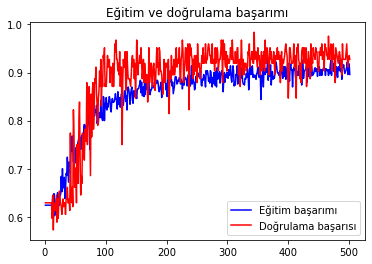

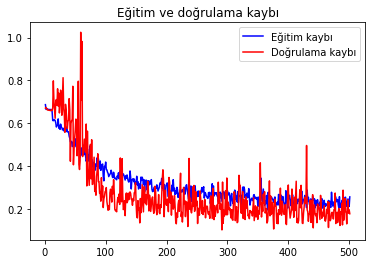

In [9]:
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1, len(acc)+1)

plt.plot(epochs,acc,'b-',label='Eğitim başarımı')
plt.plot(epochs,val_acc,'r',label='Doğrulama başarısı')
plt.title('Eğitim ve doğrulama başarımı')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'b-',label='Eğitim kaybı')
plt.plot(epochs,val_loss,'r',label='Doğrulama kaybı')
plt.title('Eğitim ve doğrulama kaybı')
plt.legend()

plt.show()

In [11]:
#cnn.save('chest_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: chest_model\assets
